In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns

In [2]:
df = pd.read_csv('../VIOS/DoctorVisits-DA.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat', 'nchronic', 'lchronic'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [5]:
df['age'] = (df['age']*100).astype(int)

In [6]:
df['income'] = df['income']*100000

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     5190 non-null   int64  
 1   gender     5190 non-null   object 
 2   age        5190 non-null   int32  
 3   income     5190 non-null   float64
 4   illness    5190 non-null   int64  
 5   reduced    5190 non-null   int64  
 6   health     5190 non-null   int64  
 7   private    5190 non-null   object 
 8   freepoor   5190 non-null   object 
 9   freerepat  5190 non-null   object 
 10  nchronic   5190 non-null   object 
 11  lchronic   5190 non-null   object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 466.4+ KB


In [9]:
df.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,19,55000.0,1,4,1,yes,no,no,no,no
1,1,female,19,45000.0,1,2,1,yes,no,no,no,no
2,1,male,19,90000.0,3,0,0,no,no,no,no,no
3,1,male,19,15000.0,1,0,0,no,no,no,no,no
4,1,male,19,45000.0,2,5,1,no,no,no,yes,no


In [10]:
df.dtypes

visits         int64
gender        object
age            int32
income       float64
illness        int64
reduced        int64
health         int64
private       object
freepoor      object
freerepat     object
nchronic      object
lchronic      object
dtype: object

In [11]:
df.isnull().sum()

visits       0
gender       0
age          0
income       0
illness      0
reduced      0
health       0
private      0
freepoor     0
freerepat    0
nchronic     0
lchronic     0
dtype: int64

In [12]:
df.shape

(5190, 12)

In [13]:
df.shape[0]

5190

In [14]:
df1 = df.drop_duplicates()

In [15]:
df1.shape

(3870, 12)

<Axes: ylabel='income'>

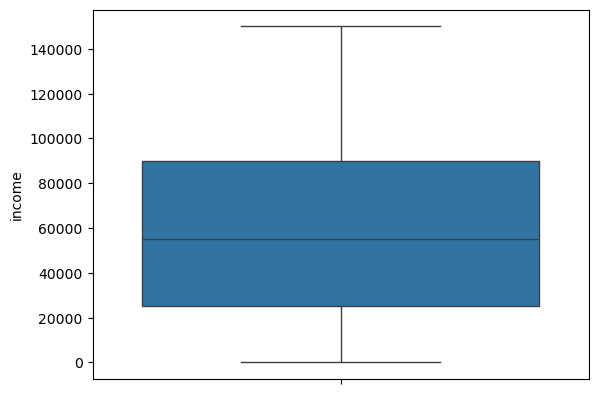

In [16]:
sns.boxplot(y='income',data=df)

<Axes: ylabel='illness'>

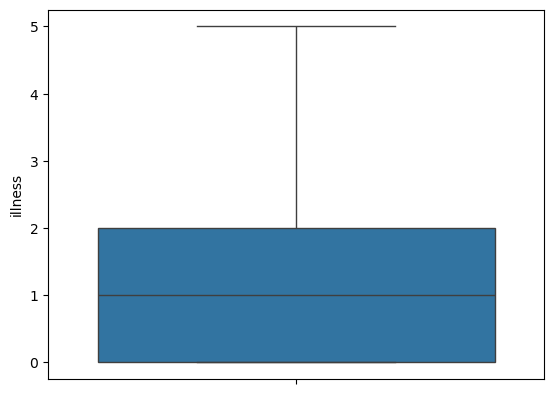

In [17]:
sns.boxplot(y='illness',data=df)

# Number of Duplicates found in the Dataset

In [19]:
print('Total number of duplicates are',df.shape[0] - df1.shape[0])

Total number of duplicates are 1320


# Find out Total number of People based on their count of illness.

In [21]:
df['illness'].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

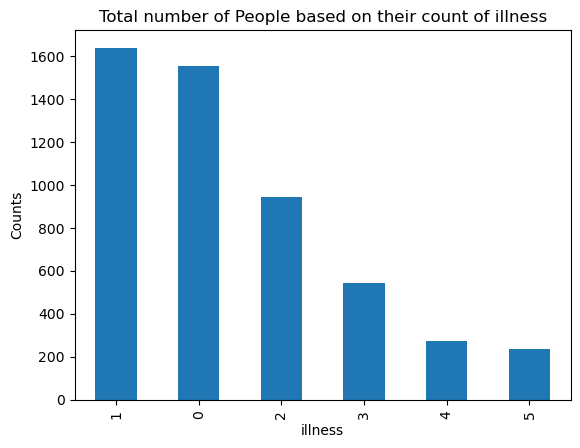

In [22]:
df['illness'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Total number of People based on their count of illness')
plt.ylabel('Counts')
plt.show()

# Gender wise illness

In [24]:
df.groupby(['gender'])['illness'].sum()

gender
female    4353
male      3079
Name: illness, dtype: int64

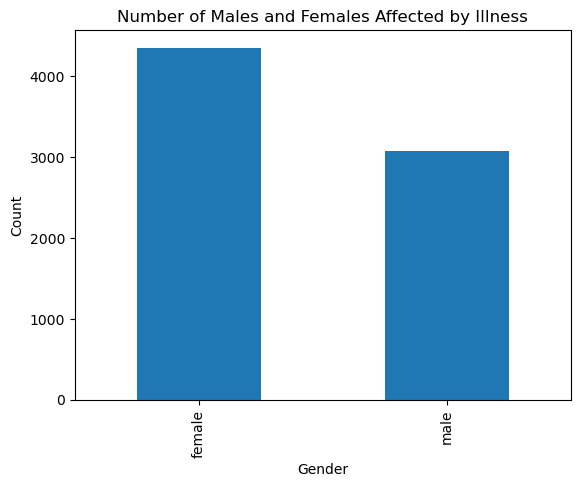

In [25]:
df.groupby(['gender'])['illness'].sum().plot(kind='bar')
plt.title('Number of Males and Females Affected by Illness')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Analyse Maximum, Minimum and Medium income People

In [27]:
df.describe()

,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,0.301734,40.585934,58315.992293,1.431985,0.861850,1.217534
std,0.798134,20.437323,36890.669837,1.384152,2.887628,2.124266
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,25000.000000,0.000000,0.000000,0.000000
50%,0.000000,32.000000,55000.000000,1.000000,0.000000,0.000000
75%,0.000000,62.000000,90000.000000,2.000000,0.000000,2.000000
max,9.000000,72.000000,150000.000000,5.000000,14.000000,12.000000


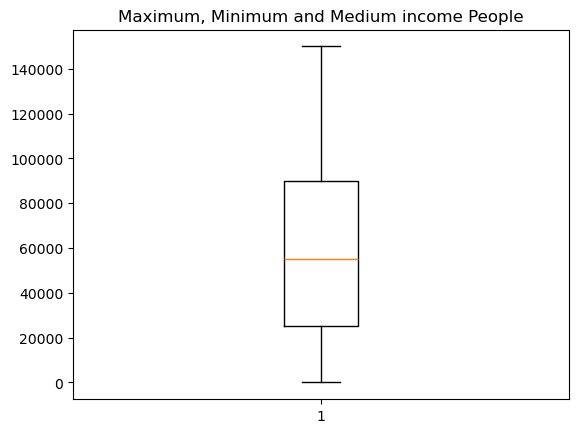

In [28]:
y = list(df.income)
plt.boxplot(y)
plt.title('Maximum, Minimum and Medium income People')
plt.show()

# Find the number of days of reduced activity of Male and Female separately due to illness

In [30]:
df.groupby(['gender', 'reduced']).apply(lambda x: x.select_dtypes(include='number').mean())

C:\Users\Gowtham\AppData\Local\Temp\ipykernel_71820\3370750249.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby(['gender', 'reduced']).apply(lambda x: x.select_dtypes(include='number').mean())


visits        age         income   illness  reduced  \
gender reduced                                                          
female 0        0.229322  46.505908   48273.522976  1.462144      0.0   
       1        0.400000  32.526316   54210.526316  2.242105      1.0   
       2        0.672727  39.072727   56018.181818  2.236364      2.0   
       3        1.333333  40.288889   51600.000000  2.733333      3.0   
       4        0.851852  45.740741   46666.666667  2.222222      4.0   
       5        1.444444  40.111111   61444.444444  2.222222      5.0   
       6        1.363636  42.454545   62272.727273  2.363636      6.0   
       7        1.384615  43.538462   47346.153846  2.653846      7.0   
       8        1.090909  47.000000   40454.545455  2.181818      8.0   
       9        0.500000  56.000000   82500.000000  3.000000      9.0   
       10       2.142857  51.142857   42142.857143  2.571429     10.0   
       12       2.000000  72.000000   25000.000000  3.500000     12.0   
       13       4.000000  72.000000   30000.000000  4.500000     13.0   
       14       1.543103  55.112069   42758.620690  2.534483     14.0   
male   0        0.136007  34.437990   69439.834025  1.099585      0.0   
       1        0.304878  28.609756   67634.146341  1.743902      1.0   
       2        0.471698  34.264151   65301.886792  2.358491      2.0   
       3        0.724138  33.413793   74137.931034  2.137931      3.0   
       4        0.722222  30.833333   86944.444444  2.055556      4.0   
       5        1.136364  33.181818   57045.454545  2.272727      5.0   
       6        0.833333  34.000000   59166.666667  2.500000      6.0   
       7        0.750000  31.416667   65500.000000  2.583333      7.0   
       8        1.333333  36.333333   83333.333333  2.666667      8.0   
       9        2.200000  30.800000   39200.000000  2.400000      9.0   
       10       1.800000  47.800000   59000.000000  2.600000     10.0   
       11       5.000000  32.000000  100000.000000  1.500000     11.0   
       12       2.000000  36.750000   51500.000000  1.500000     12.0   
       13       4.000000  51.000000   35000.000000  3.333333     13.0   
       14       1.555556  47.652778   59861.111111  2.375000     14.0   

                  health  
gender reduced            
female 0        1.115098  
       1        1.610526  
       2        1.781818  
       3        1.733333  
       4        2.074074  
       5        2.500000  
       6        1.363636  
       7        2.230769  
       8        4.000000  
       9        1.000000  
       10       2.000000  
       12       5.500000  
       13       3.500000  
       14       4.112069  
male   0        0.924850  
       1        1.256098  
       2        1.547170  
       3        1.689655  
       4        2.000000  
       5        2.818182  
       6        2.000000  
       7        4.333333  
       8        2.000000  
       9        2.000000  
       10       4.600000  
       11       0.500000  
       12       1.000000  
       13       2.333333  
       14       3.527778

# Visualize, is there any missing values in the dataset using Heat map chart

<Axes: >

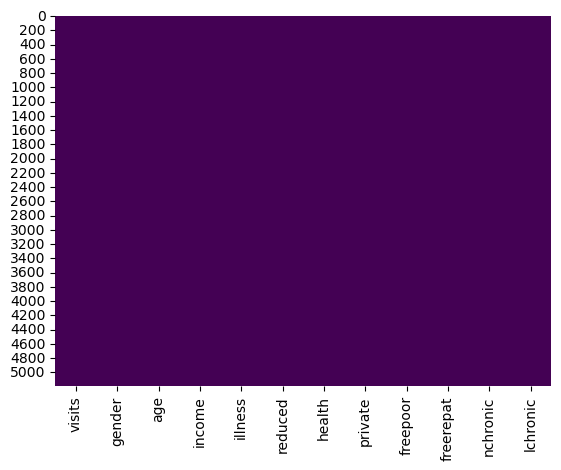

In [32]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Correlation between variables (means columns) of the dataset and identify which variables are mostly correlated.

<Axes: >

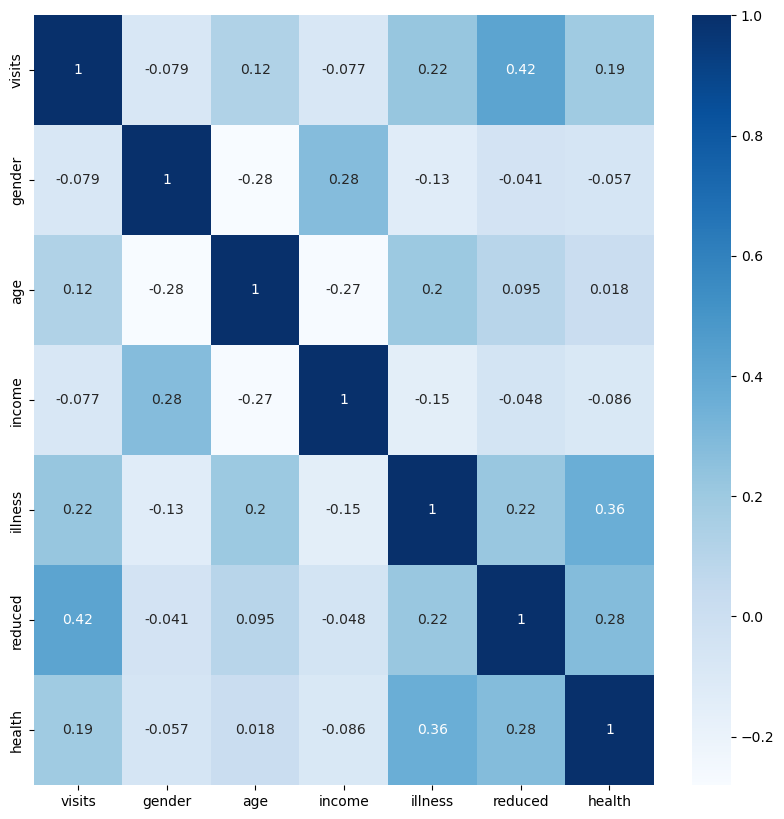

In [34]:
plt.figure(figsize=(10,10))
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply it to the desired column (e.g., 'gender')
df['gender'] = label_encoder.fit_transform(df['gender'])

sns.heatmap(df.select_dtypes(include='number').corr(), cbar=True, annot=True, cmap='Blues')

# Analyse how income of People affects the number of visits to the Hospital

Text(0, 0.5, 'visits')

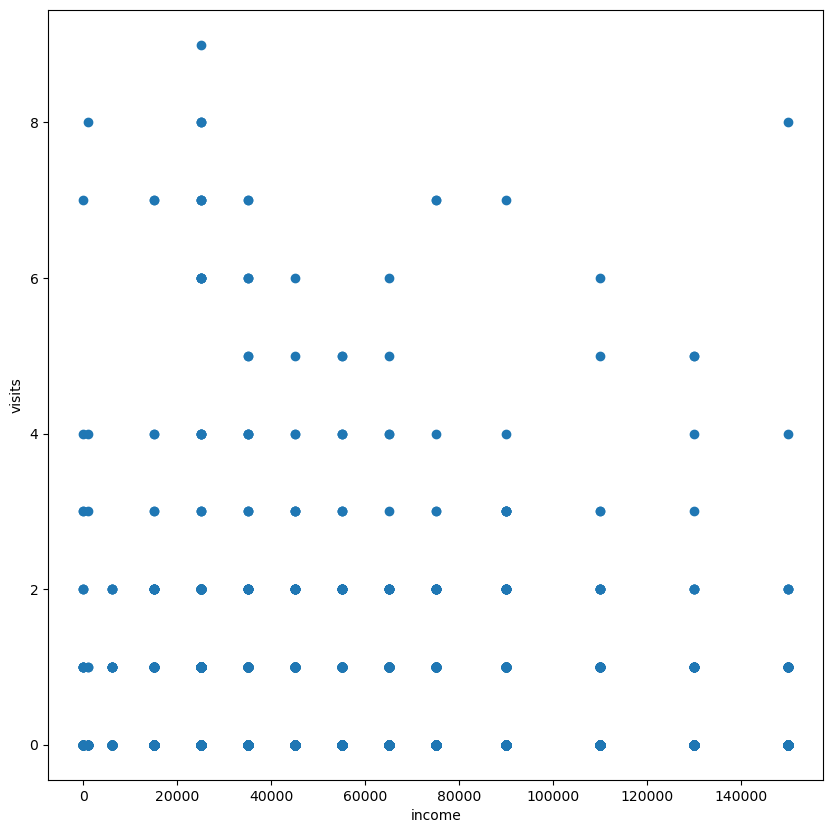

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')

# Count and Visualize the number of Males and Females affected by illness

<Axes: xlabel='gender', ylabel='Count'>

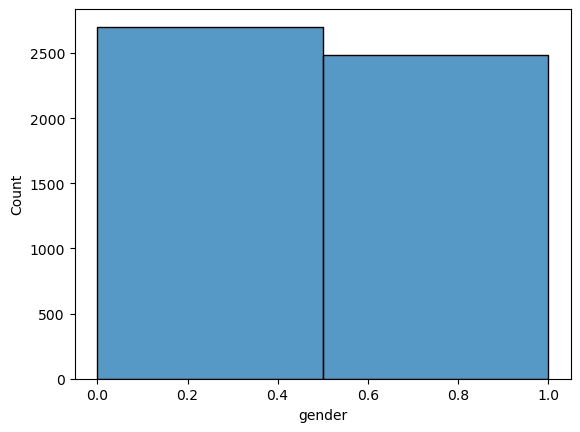

In [38]:
sns.histplot(df.gender,bins=2)

# Visualize the Percentage of People getting Govt. health insurance due to low income, due to old age. Also calculate the Percentage of People having Private Health Insurance.

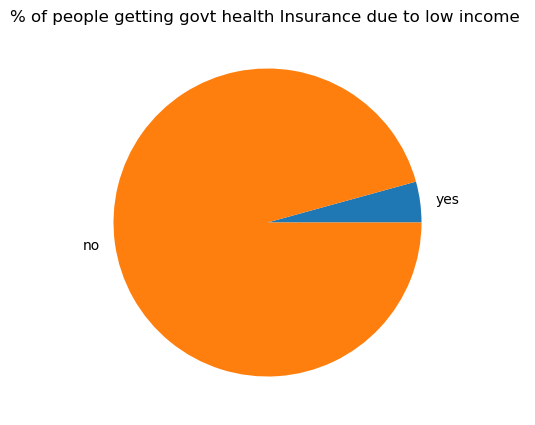

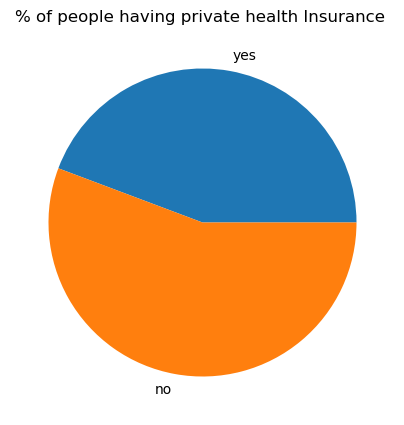

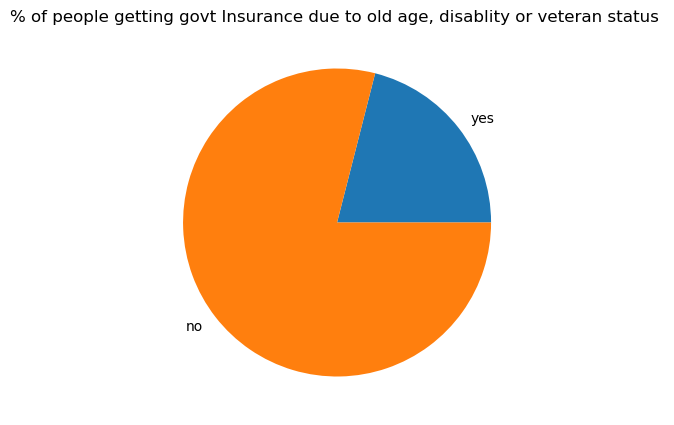

In [40]:
# % of people getting govt Insurance due to low income
label = ['yes','no']
Y = df[df['freepoor']=='yes']
N = df[df['freepoor']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title("% of people getting govt health Insurance due to low income ")
plt.show()

# % of people having private Insurance
Y = df[df['private']=='yes']
N = df[df['private']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title('% of people having private health Insurance ')
plt.show()

# % of people getting govt Insurance due to old age, disablity or veteran status
Y = df[df['freerepat']=='yes']
N = df[df['freerepat']=='no']
x = [Y.shape[0],N.shape[0]]
plt.figure(figsize=(5,5))
plt.pie(x,labels=label)
plt.title('% of people getting govt Insurance due to old age, disablity or veteran status ')
plt.show()

# Plot bar chart to analyse the reduced days of activity due to illness based on Gender

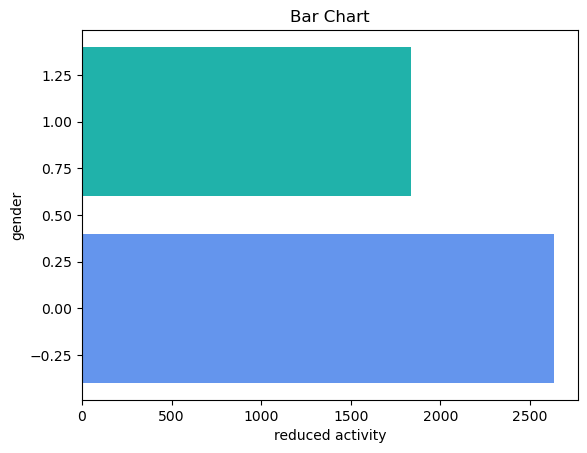

In [80]:
db = df.groupby('gender')['reduced'].sum().to_frame().reset_index()
# Creating the bar chart
plt.barh(db['gender'],db['reduced'],color=['cornflowerblue','lightseagreen'])
# Adding the aesthetics
plt.title('Bar Chart')
plt.xlabel('reduced activity')
plt.ylabel('gender')
plt.show()

# Relation between Health status and Activity reduction using heat map chart

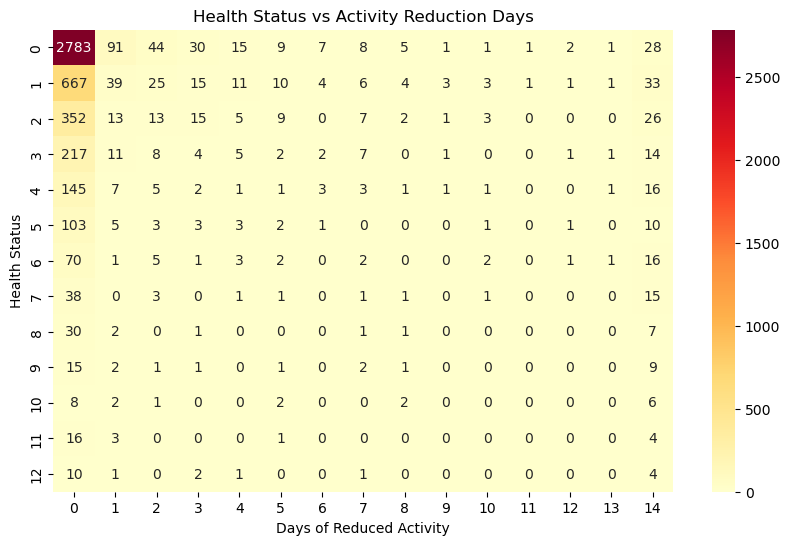

In [82]:
health_activity = pd.crosstab(df['health'], df['reduced'])
plt.figure(figsize=(10, 6))
sns.heatmap(health_activity, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Health Status vs Activity Reduction Days')
plt.xlabel('Days of Reduced Activity')
plt.ylabel('Health Status')
plt.show()